In [3]:
import numpy as np
import os
from scipy.misc.pilutil import imread, imresize
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [4]:
paths = ["C:/Users/Kim/animal/dog",
        "C:/Users/Kim/animal/cat",
        "C:/Users/Kim/animal/cow",
        "C:/Users/Kim/animal/pig",
        "C:/Users/Kim/animal/rabbit"]
categories = ['dog','cat','cow','pig','rabbit']

In [5]:
imsize = [64, 64]
use_gray = 1
data_name = 'custom_data'

print('Your images should be at')
for i, path in enumerate(paths):
    print('[%d/%d] %s' % (i, len(paths), path))
print('Data will be saved to \n [%s]' %('C:/Users/Kim/animal/' + data_name + '.npz'))


Your images should be at
[0/5] C:/Users/Kim/animal/dog
[1/5] C:/Users/Kim/animal/cat
[2/5] C:/Users/Kim/animal/cow
[3/5] C:/Users/Kim/animal/pig
[4/5] C:/Users/Kim/animal/rabbit
Data will be saved to 
 [C:/Users/Kim/animal/custom_data.npz]


In [6]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    else:
        return rgb


In [7]:
nclass = len(paths)
valid_exts = ['.jpg']
imgcnt = 0

for i, relpath in zip(range(nclass), paths):
    path =relpath
    #print(path)
    flist = os.listdir(path)
    #print(flist)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        #print(fullpath)
        currimg = imread(fullpath)
        #print(currimg.shape)
        #print(currimg[..., :3])#그냥 :로 해도 똑같네
        if use_gray:
            grayimg = rgb2gray(currimg)
        else:
            grayimg = currimg
        graysmall = imresize(grayimg, [imsize[0], imsize[1]])/255#그림 사이즈 통일!
        grayvec = np.reshape(graysmall, (1, -1))
        #print(grayvec, grayvec.shape)
        curr_label = np.eye(nclass, nclass)[i:i+1, :]#np.eye(m,n) : m x n identity matrix 생성 np.eye(5,5)는 np.eye(5)랑 같아! 그 중 i번째 행만 따와서 라벨링으로 사용 
        
        #print(curr_label)
        if imgcnt is 0:
            totalimg = grayvec
            totallabel = curr_label
        else:
            totalimg = np.concatenate((totalimg, grayvec), axis=0) #np.concatenate 는 array를 합치는 역할 axis=0 : y축 방향으로 쌓음 ex http://eminentstar.tistory.com/25
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt = imgcnt + 1
print('Total %d images' %(imgcnt))
#print(np.eye(5)[0:1,:])
#print(totallabel)
print(totalimg.shape)

C:\Users\Kim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\Kim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Total 100 images
(100, 4096)


In [8]:
#devide into training and test sets

def print_shape(string, x):
    print('SHAPE OF [%s] IS [%s]' %(string, x.shape))
    
randidx = np.random.randint(imgcnt, size=imgcnt)
#randidx
trainidx = randidx[0:int(4*imgcnt/5)]
testidx = randidx[int(4*imgcnt/5):imgcnt]
trainimg = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
#print(trainlabel)
#totalimg[2, :].shape
#testimg = totalimg[]
testimg = totalimg[testidx, :]
testlabel = totallabel[testidx, :]
print_shape('totalimg', totalimg)
print_shape('totallabel', totallabel)
print_shape('trainimg', trainimg)
print_shape('trainlabel', trainlabel)
print_shape('testimg', testimg)
print_shape('testlabel', testlabel)



SHAPE OF [totalimg] IS [(100, 4096)]
SHAPE OF [totallabel] IS [(100, 5)]
SHAPE OF [trainimg] IS [(80, 4096)]
SHAPE OF [trainlabel] IS [(80, 5)]
SHAPE OF [testimg] IS [(20, 4096)]
SHAPE OF [testlabel] IS [(20, 5)]


In [9]:
#Save to npz : numpy 데이터 저장
savepath = cwd +'\\animal\\custom_data.npz'
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imsize, use_gray=use_gray, categories=categories)

In [10]:
#load npz
cwd = os.getcwd()
loadpath = cwd +'\\animal\\custom_data.npz'
l = np.load(loadpath)
print(l.files)


['use_gray', 'imgsize', 'categories', 'trainlabel', 'testlabel', 'trainimg', 'testimg']


In [11]:
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']
testimg_loaded = l['testimg']
categories_loaded = l['categories']

print('[%d] Training images' %(trainimg_loaded.shape[0]))
print('[%d] Test images' %(testimg_loaded.shape[0]))

[80] Training images
[20] Test images


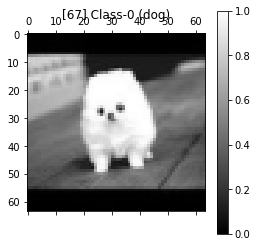

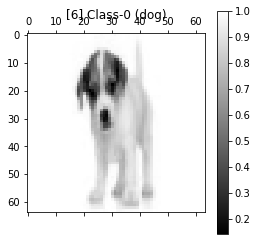

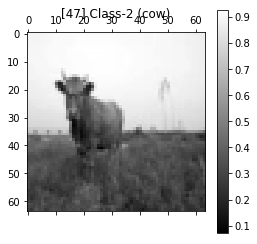

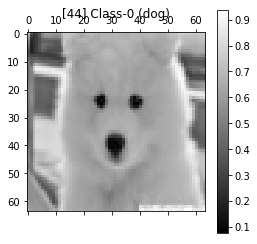

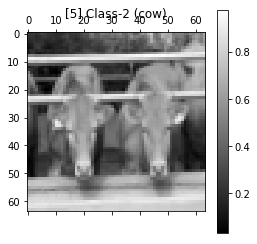

(80, 4096)

In [16]:
#plot loaded data
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 5
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx:
    currimg = np.reshape(trainimg_loaded[i, :], (imsize[0], -1))#imgsize 아니다 
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot)
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imsize[0], -1))#trainimg왜??? npz로 저장해놔서 np쓰면 그냥 되는건가?
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imsize[0], imsize[1], 3))
        plt.imgshow(currimg)
    title_string = ('[%d] Class-%d (%s)' %(i, currlabel, categories_loaded[currlabel]))
    
    plt.title(title_string)
    plt.show()
    
trainimg.shape